**Proyecto Data Science (Delitos 2021)**

Contamos con un informe donde se muestra los delitos denunciados en la ciudad de Buenos Aires durante el año 2021, en el cual clasifica fecha, dia, franja (Horario),zona, tipo de delito, cantidad de delitos. Un analisis, para poder comprarar la zona mas caliente (peligrosa), y los tipo de delitos que ocurren alli. Esto sumando que se pueden tomar decisiones politicas sobre seguridad, en dias y horarios mas problematicos.

                                                  fuente: https://data.buenosaires.gob.ar/dataset/

Presentacion del Dataset (Delitos 2021)

In [43]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_delito = pd.read_csv('delitos_2021.csv', sep=";")

df_delito.head()


,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad,Unnamed: 14,Unnamed: 15
0,LC-2021-1000090,2021,Enero,Viernes,01/01/2021,0,Lesiones,Siniestro Vial,NaN,Villa Lugano,8.0,-34,672422,-58,493447.0,2.0
1,LC-2021-1000306,2021,Enero,Viernes,01/01/2021,7,Lesiones,Siniestro Vial,NaN,NaN,0.0,20,20,2,NaN,NaN
2,LC-2021-1000361,2021,Enero,Viernes,01/01/2021,10,Lesiones,Siniestro Vial,NaN,San Telmo,1.0,-34,621941,-58,374171.0,1.0
3,LC-2021-1000449,2021,Enero,Viernes,01/01/2021,6,Lesiones,Siniestro Vial,NaN,Boca,4.0,-34,637012,-58,366628.0,1.0
4,LC-2021-1000572,2021,Enero,Viernes,01/01/2021,10,Lesiones,Siniestro Vial,NaN,Boca,4.0,-34,637213,-58,367929.0,1.0



Muestra de cantidad de registros y columnas.


In [13]:
df_delito.shape

(88567, 14)


Muestra de Valores y tipo de datos.


In [14]:
df_delito.dtypes

id-mapa       object
anio           int64
mes           object
dia           object
fecha         object
franja        object
tipo          object
subtipo       object
uso_armas     object
barrio        object
comuna       float64
latitud       object
longitud      object
cantidad     float64
dtype: object

**Grafico**

El grafico, muestra la cantidad de delitos que se cometieron durante el 2021 (Totales), segun si se ejercicio violencia, y que tipo de violencia.

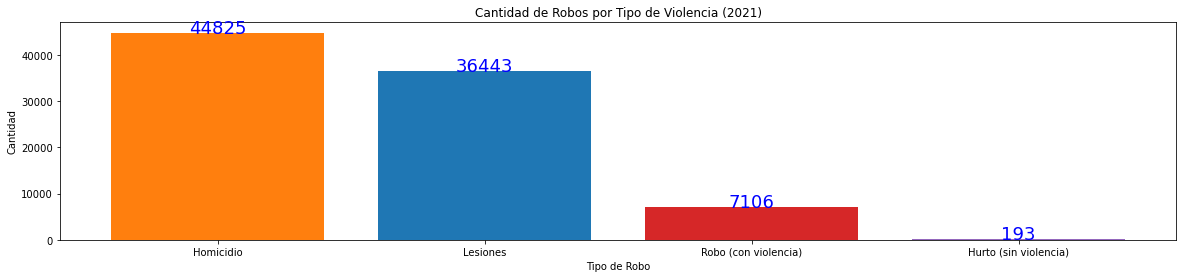

In [17]:
df_delito = pd.read_csv('delitos_2021.csv', sep=";", usecols=['anio','mes','dia','fecha','tipo','subtipo','barrio','cantidad'])


x_datos = df_delito.tipo.unique()

y_datos = df_delito.tipo.value_counts().tolist()

bar_colors = ['tab:orange', 'tab:blue', 'tab:red', 'tab:purple']

plt.bar(x_datos, y_datos, color = bar_colors)

plt.title('Cantidad de Robos por Tipo de Violencia (2021)')

ax = plt.subplot() 

ax.set_xlabel('Tipo de Robo')

ax.set_ylabel('Cantidad')


plt.rcParams['figure.figsize'] = (20, 4)

for x,y in enumerate(y_datos):
    plt.text(x, y-38, '%s' %round(y,1), ha='center',fontsize=18,color = 'blue')


plt.show()



En el siguiente grafico, se muestra la cantidad de delitos cometidos por mes (Totales)


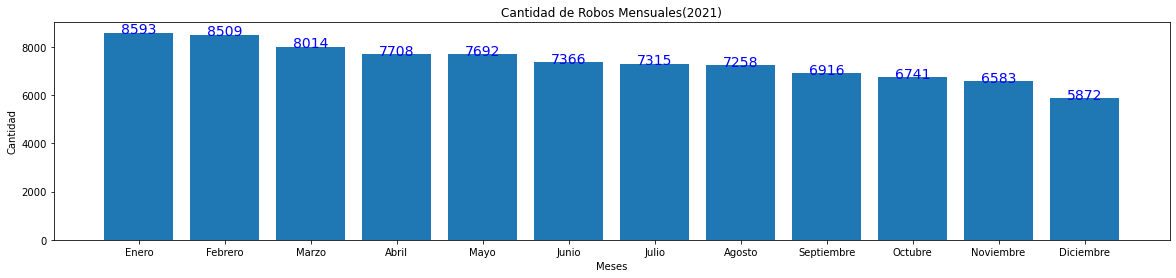

In [19]:
x_datos = df_delito.mes.unique()

y_datos = df_delito.mes.value_counts().tolist()

plt.bar(x_datos, y_datos)

plt.title('Cantidad de Robos Mensuales(2021)')

ax = plt.subplot() 

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad')

plt.rcParams['figure.figsize'] = (20, 4)




for x,y in enumerate(y_datos):
    plt.text(x, y-38, '%s' %round(y,1), ha='center',fontsize=14,color = 'blue')
plt.show()

## **Analisis de los datos II**

 ## Introducción

### Contexto Empresarial
La ciudad Autonoma de Buenos Aires, tiene un incremento de delitos en la ciudad. El dataset cuenta con datos sobre ubicacion, fecha, año, ademas de tener tipo de delito, si se uso armas o tiene implicado algun elemento en el mismo. 

### Problemas comerciales
Crear visualizaciones que proporcion datos que sirvan para relevar las zonas donde se originan mas delitos, y asi tomar acciones de seguridad policial.


### Contexto Analitico

Desde un archivo csv, que contiene detalles sobre delitos realizados en la ciudad de buenos aires, con fecha y franja horario,  ubicacion geografica del delito, tipo de delito, si se utilizaron armas o algun elemento contudente para realizar el robo. 

1-. Cantidad de Robos Mensuales
2-. Cantidad de Robos por Franja Horaria

In [13]:
df_delito.columns

Index(['id-mapa', 'anio', 'mes', 'dia', 'fecha', 'franja', 'tipo', 'subtipo',
       'uso_armas', 'barrio', 'comuna', 'latitud', 'longitud', 'cantidad'],
      dtype='object')

Se muestran las siguientes Columnas:

1. - id-mapa = Es el id de la ubicacion en el mapa de ciudad.
2. - anio = Es el año del delito.
3. - mes = Es el mes del delito.
4. - dia = Del delito.
5. - fecha = Es la fecha completa del delito.
6. - franja = Es la franja horaria donde se realizo el delito.
7. - tipo = Caracteristicas del delito (homicidio, lesiones, robo o hurto).
8. - subtipo = Donde se origino el delito (sinietro vial, etc).
9. - uso_armas = Si hubo uso de algun elemento en el delito (armas, cuchillos, etc).
10. - barrio = Lugar donde ocurrio el delito.
11. - comuna = Comuna donde ocurrio el delito.
12. - latitud = Ubicación por coordenas de donde fue el delito.
13. - cantidad = Cantidad de delitos (generalmente es uno, pero puede ser que se hicieron varios en el mismo lugar).

### Cantidad de Robos Mensuales

<AxesSubplot:xlabel='fecha'>

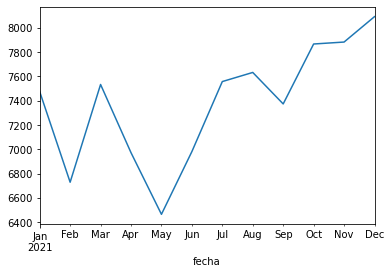

In [47]:
df_delito1 = df_delito
df_delito['fecha']=pd.to_datetime(df_delito['fecha'])
delito_mensuales =df_delito.groupby(df_delito['fecha'].dt.to_period('M')).size()
delito_mensuales.plot.line()

## Cantidad de Delitos Por Franja Horaria

Text(0, 0.5, 'Total de Delitos')

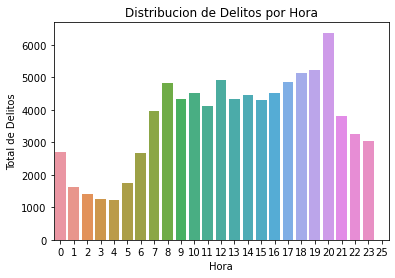

In [53]:
df_delito1['franja'] = df_delito1['franja']
df_delito3 = df_delito1.groupby('franja').size()
df_delito3.index
df_delito3.values
sns.barplot(x=df_delito3.index, y=df_delito3.values)
plt.title('Distribucion de Delitos por Hora')
plt.xlabel('Hora')
plt.ylabel('Total de Delitos')